<a href="https://colab.research.google.com/github/cheng0908/DataMining/blob/main/Health_care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
About data set
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack
Attribute Information
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6)fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11)the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack
```



#Version 1(Without PCA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart_df = pd.read_csv('/content/drive/MyDrive/Colab_Practice/Datasets/heart.csv')
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
print(heart_df.info())
print(heart_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set: (303, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    13 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification VISUALIZATION Started #####################


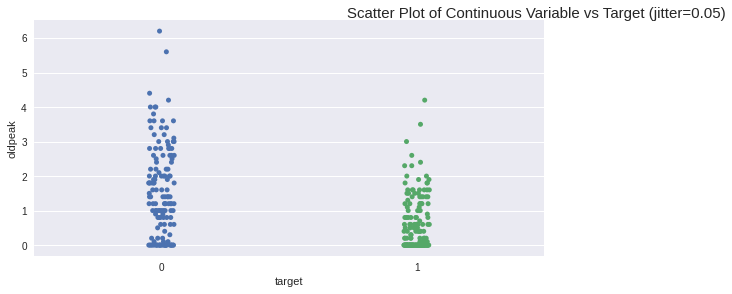

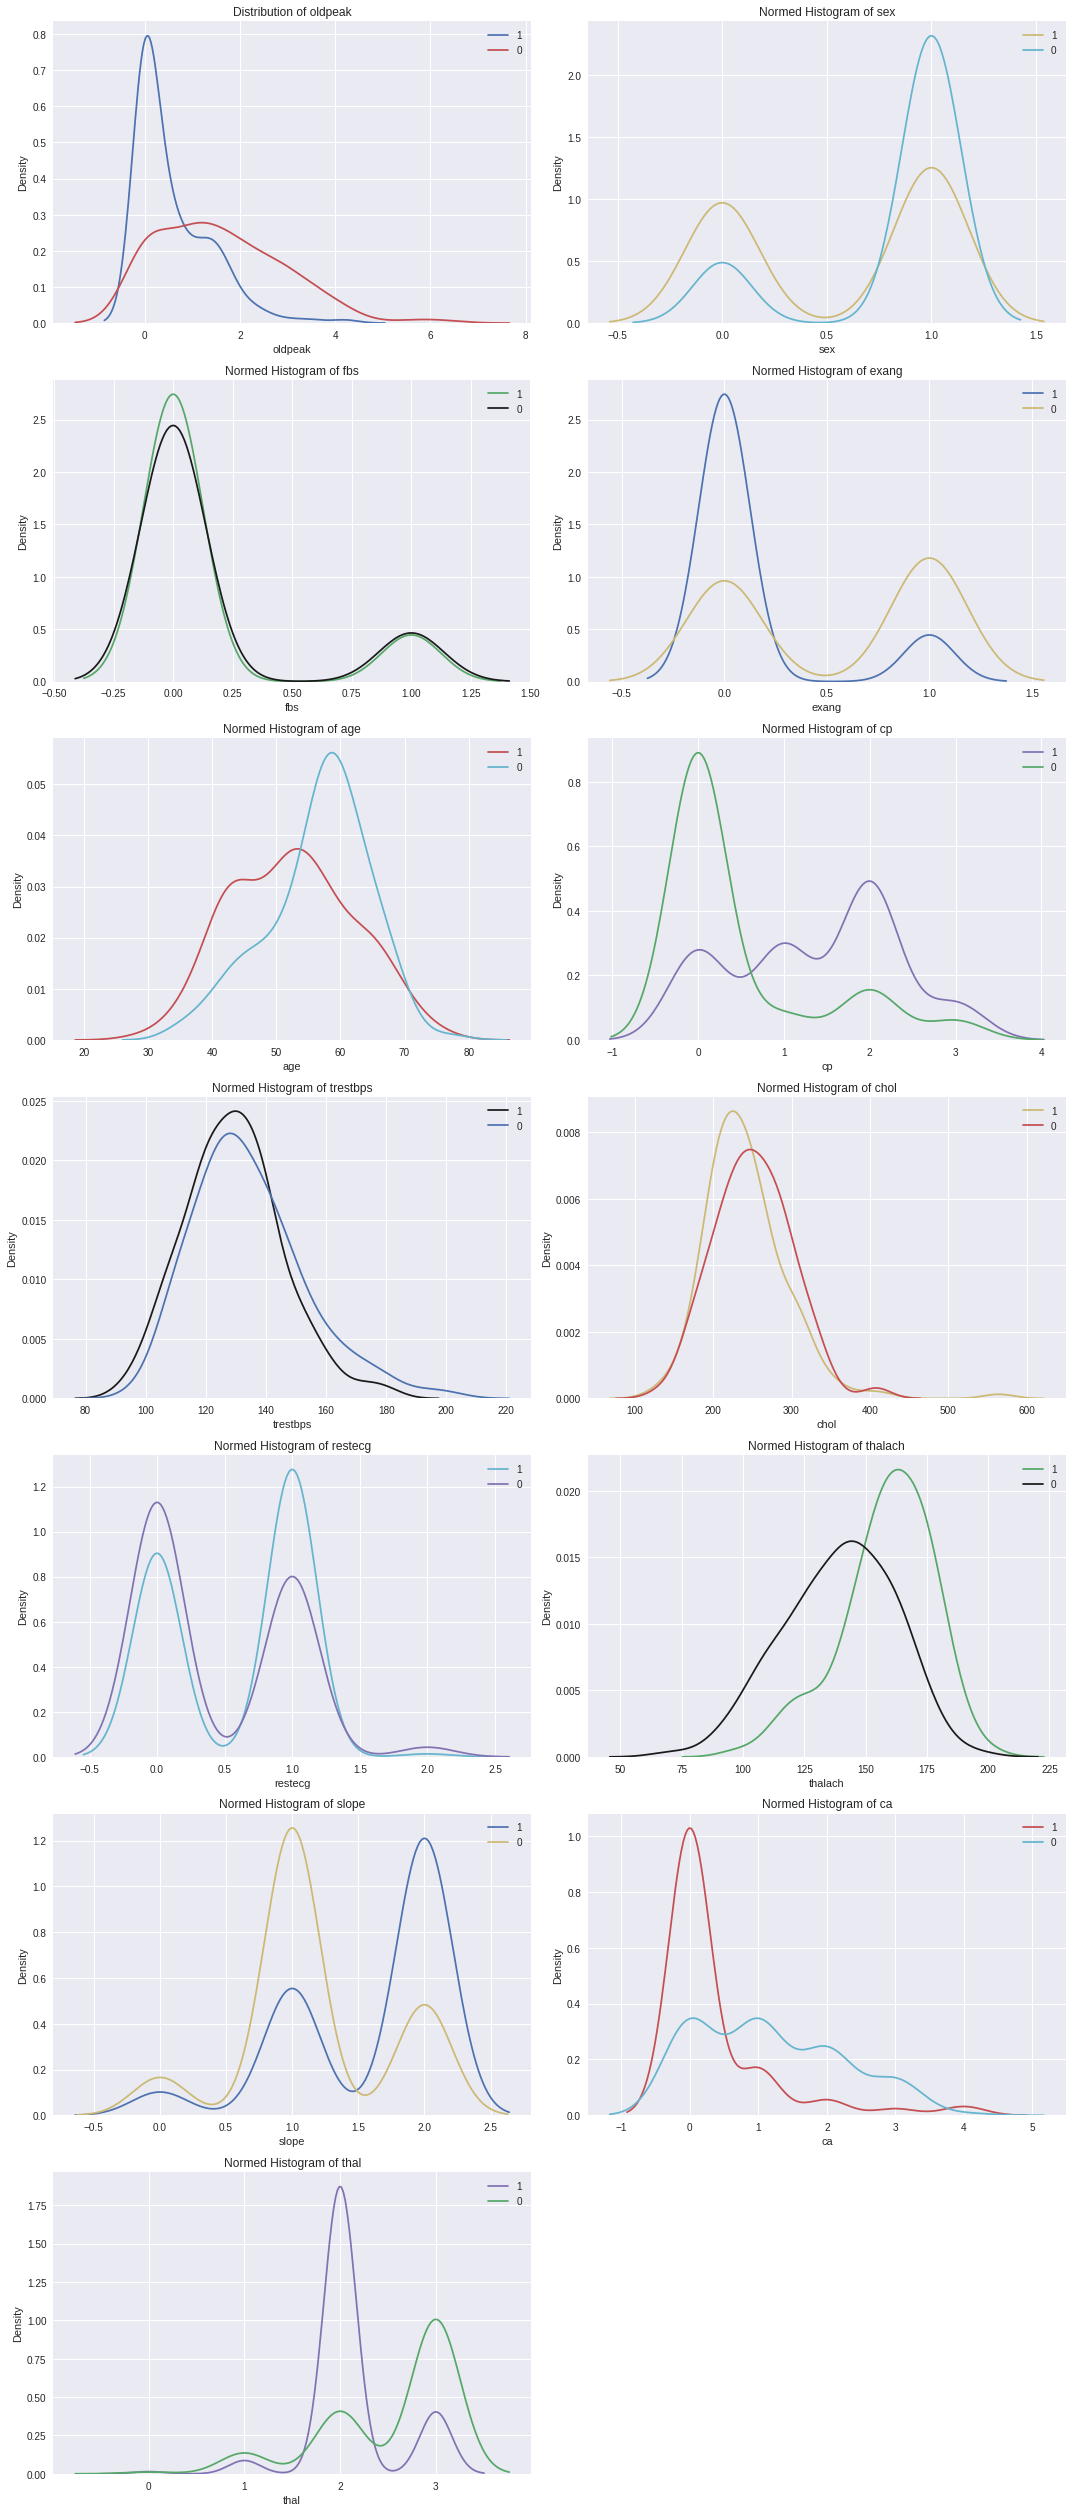

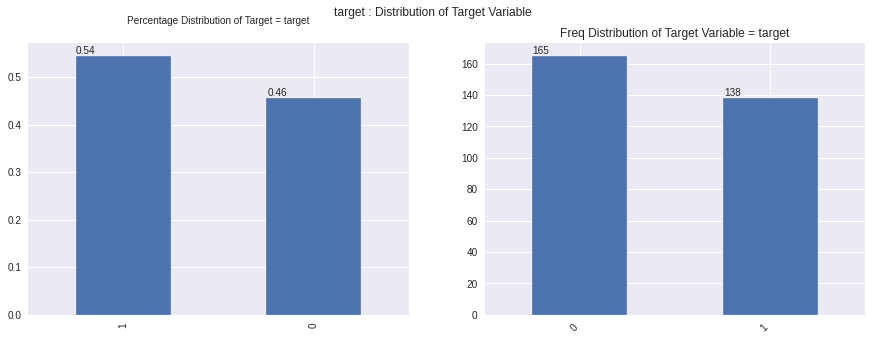

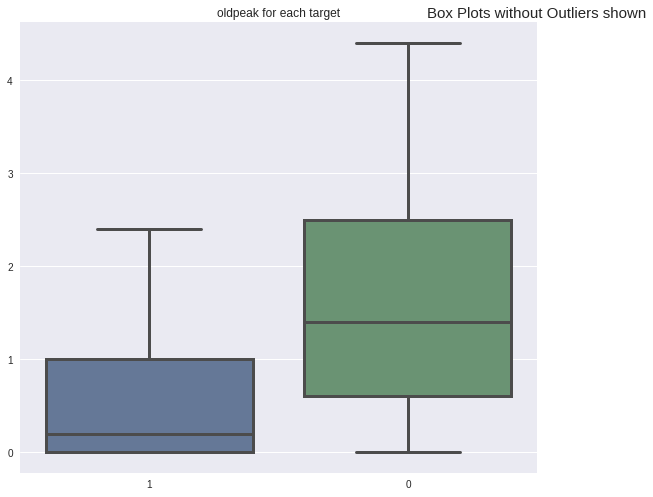

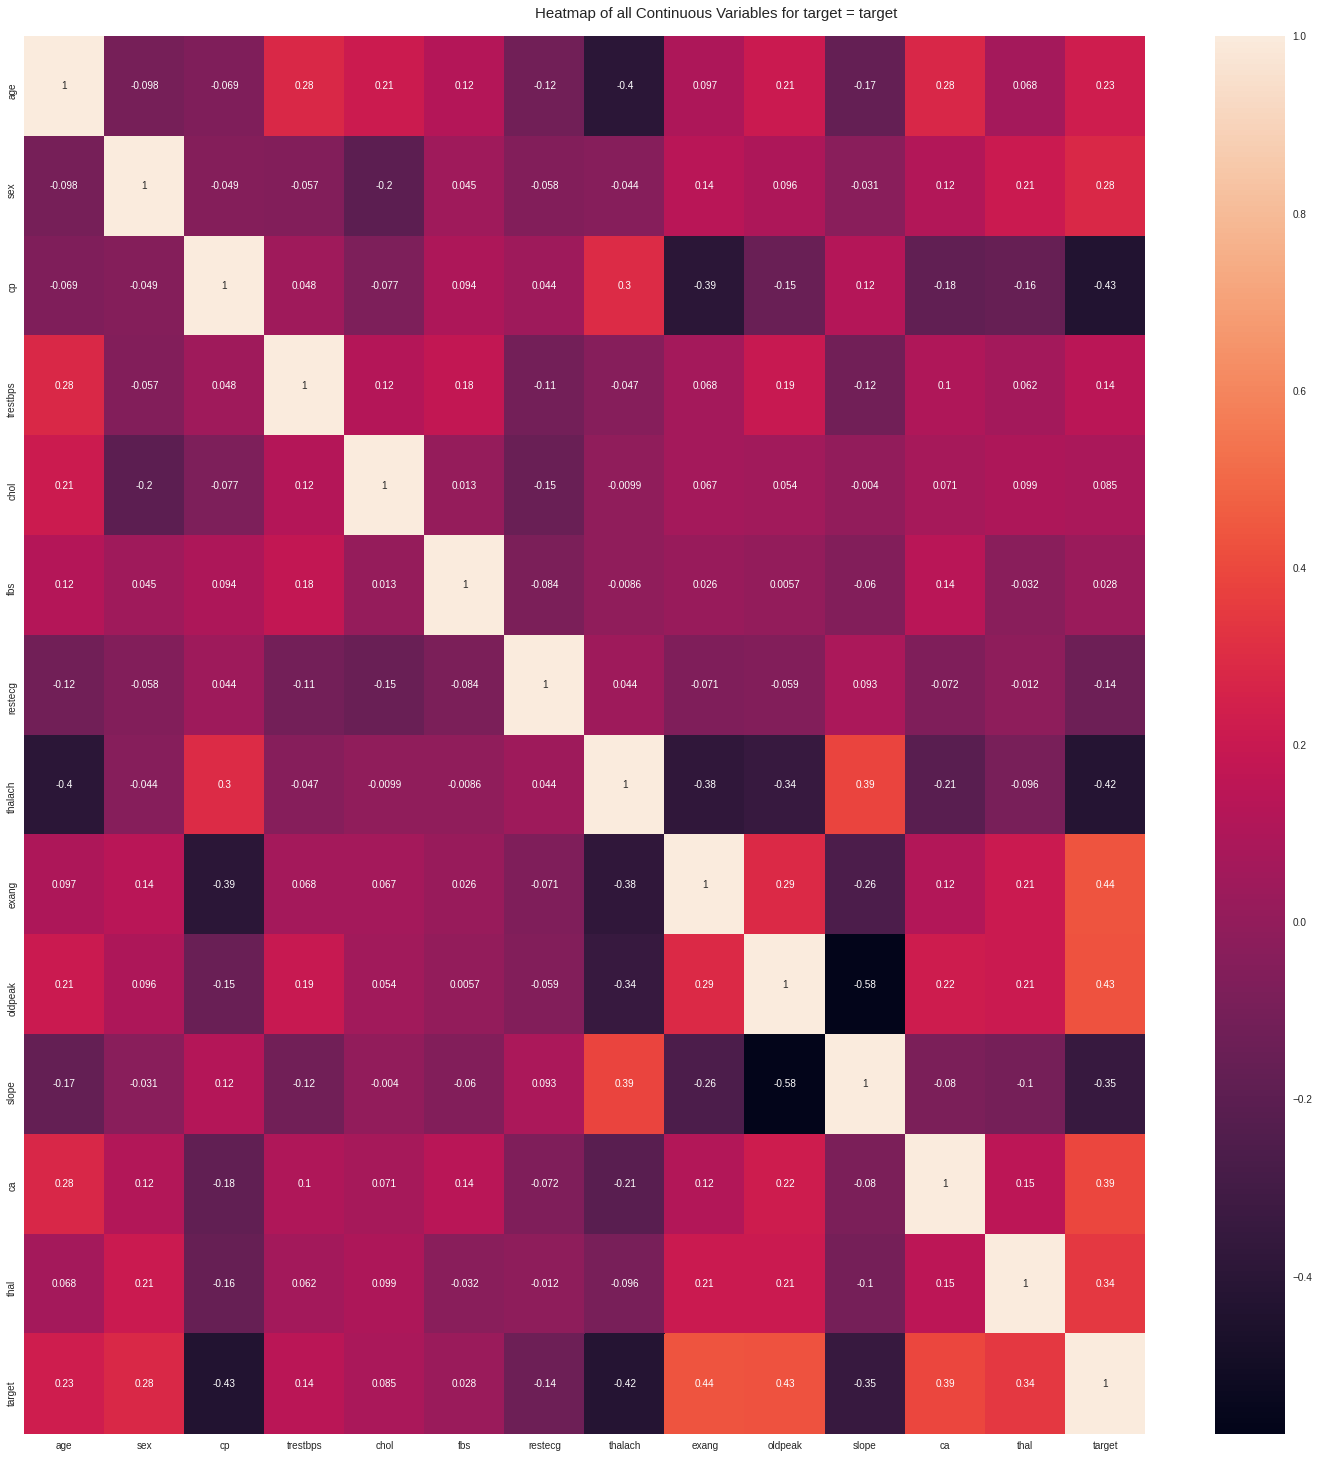

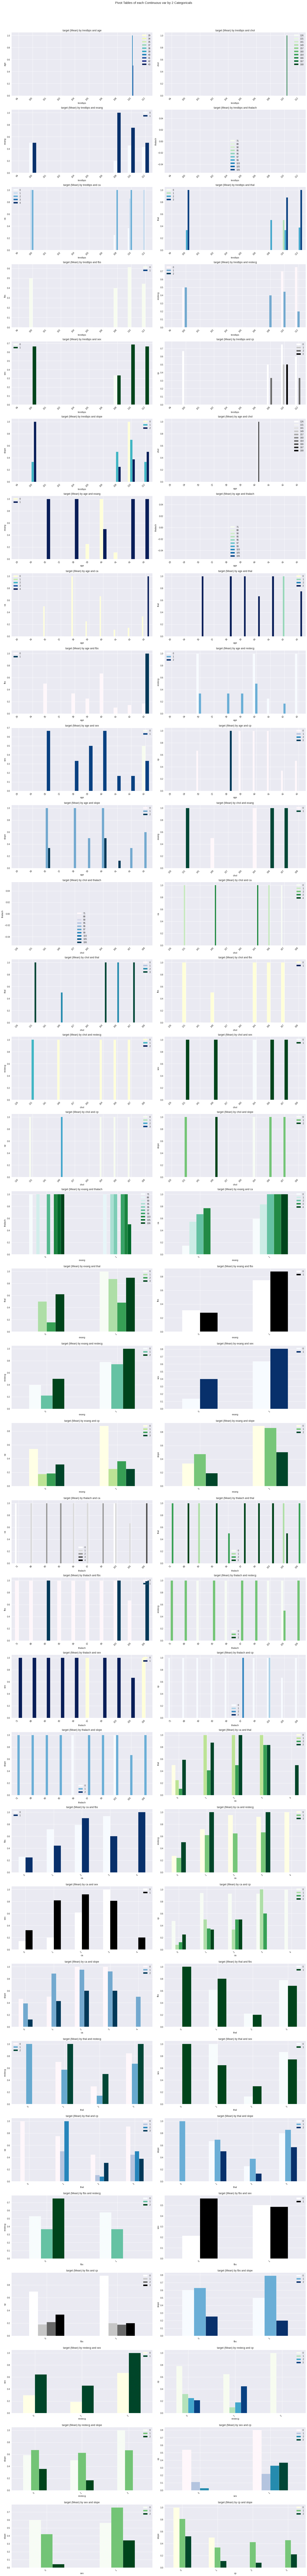

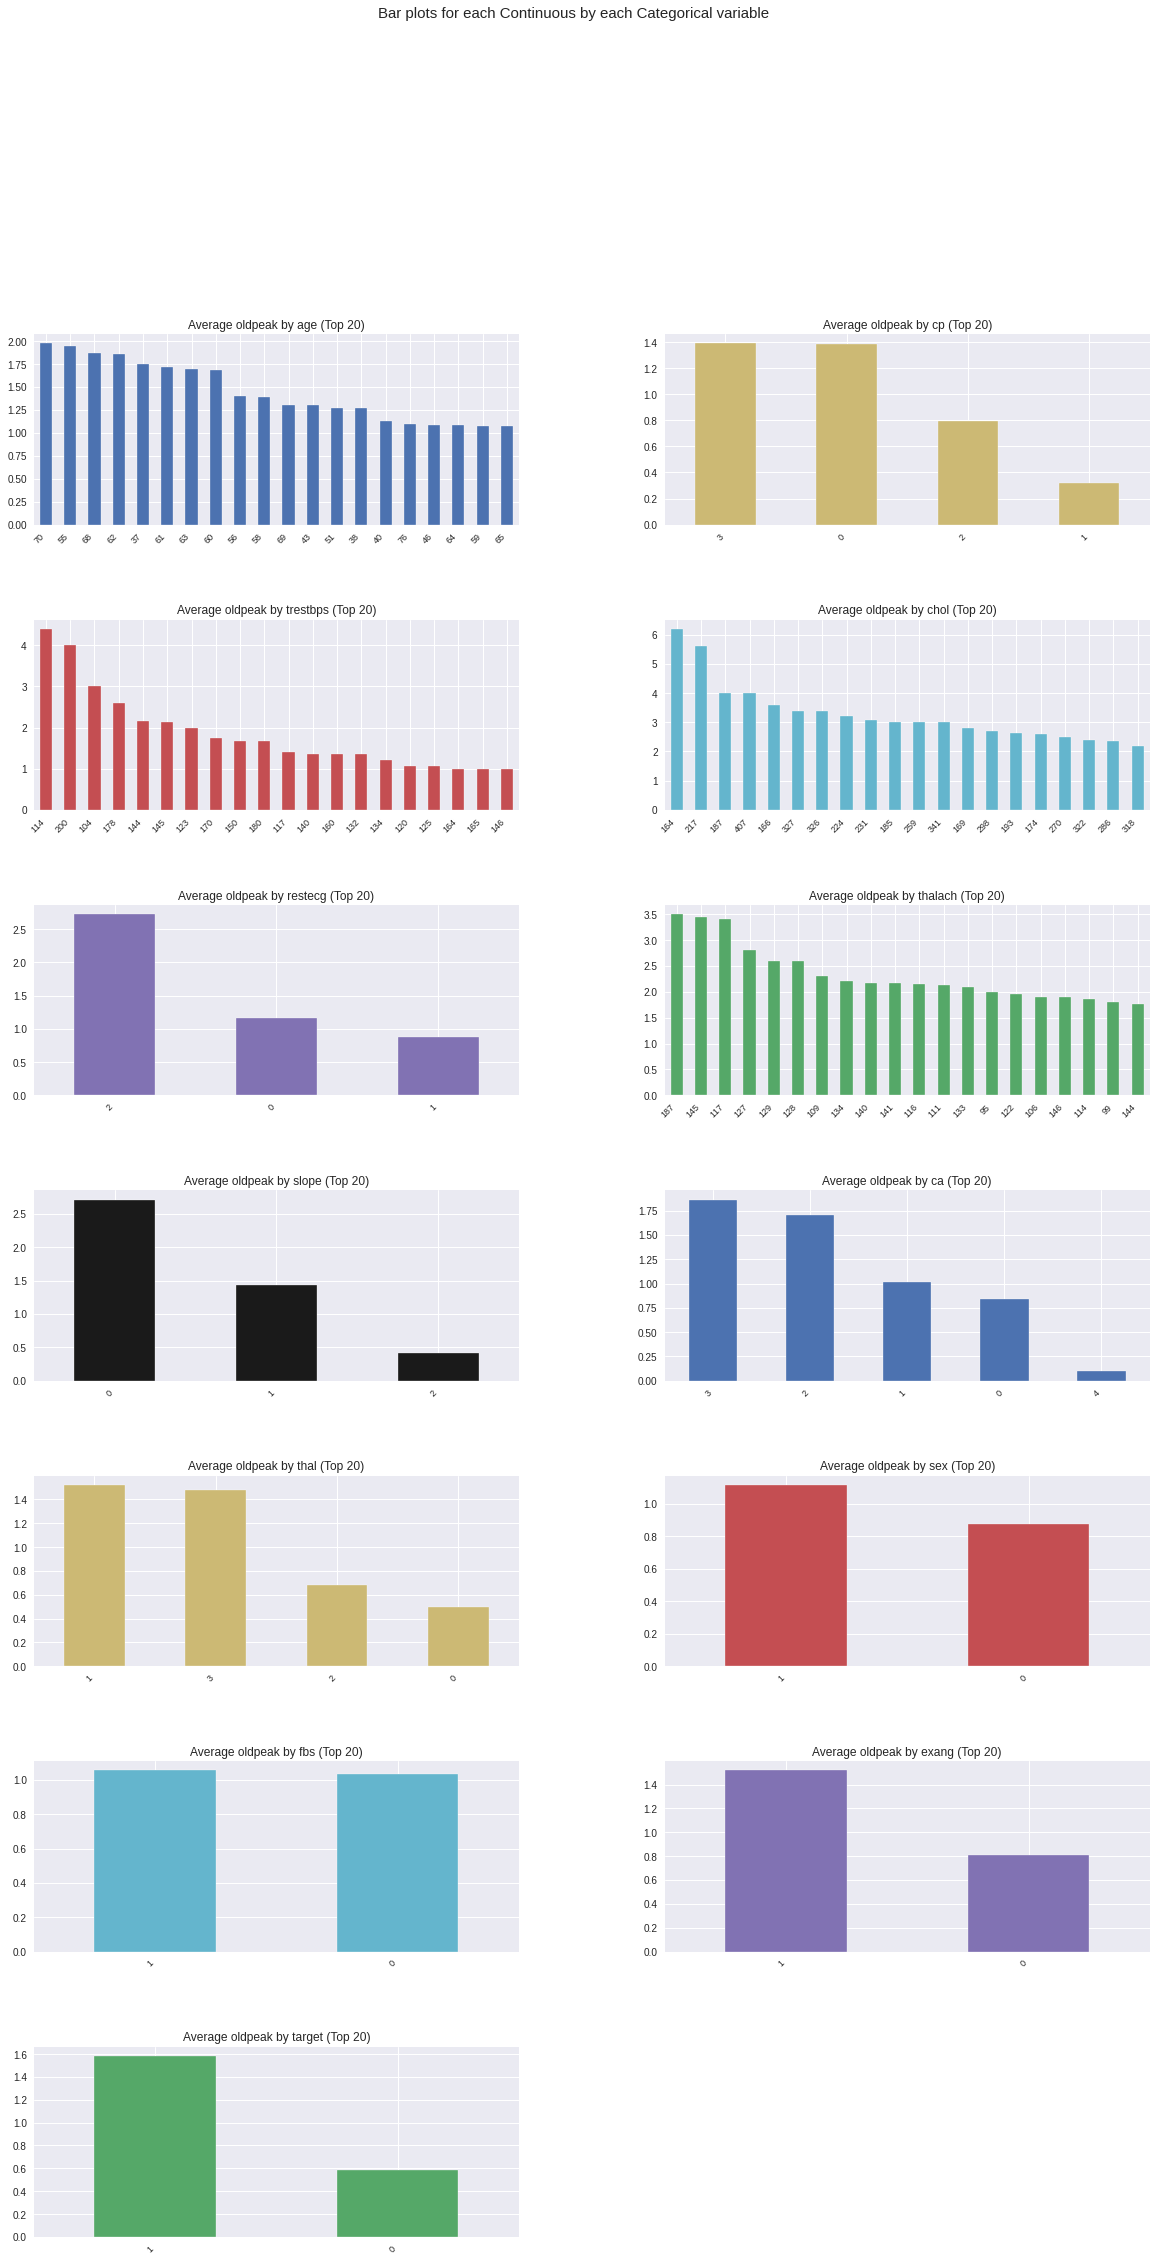

Time to run AutoViz (in seconds) = 32.121

 ###################### VISUALIZATION Completed ########################


In [ ]:
df = AV.AutoViz(filename='/content/drive/MyDrive/Colab_Practice/Datasets/heart.csv', depVar="target")

In [ ]:
y= heart_df['target']
x= heart_df.drop('target',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.5)

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

LogisticRegression:
Train set accuracy: 0.8807947019867549
Test set accuracy: 0.8157894736842105
The confusion metrix of tranning set
 [[57 12]
 [ 6 76]]
The confusion metrix of testing set
 [[48 21]
 [ 7 76]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77        69
           1       0.78      0.92      0.84        83

    accuracy                           0.82       152
   macro avg       0.83      0.81      0.81       152
weighted avg       0.82      0.82      0.81       152



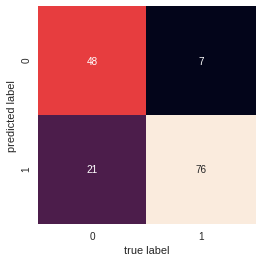

In [ ]:
lr.fit(x_train, y_train)
# pred_1 = lr.predict(x_test)
# score_1 = accuracy_score（y_test, pred_1)
print('LogisticRegression:')
print('Train set accuracy:', lr.score(x_train, y_train))
print('Test set accuracy:', lr.score(x_test, y_test))

cnf = confusion_matrix(y_train, lr.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, lr.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, lr.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, lr.predict(x_test)))

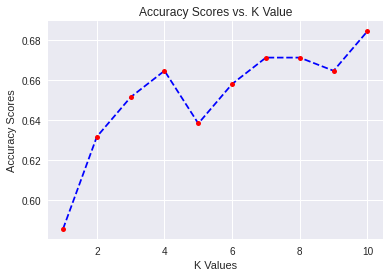

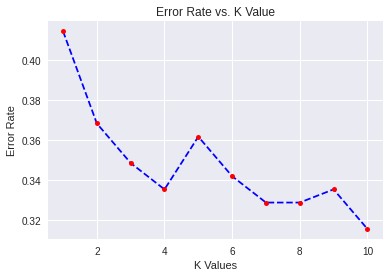

,0,1
0,10,0.684211
1,7,0.671053
2,8,0.671053
3,4,0.664474
4,9,0.664474
5,6,0.657895
6,3,0.651316
7,5,0.638158
8,2,0.631579
9,1,0.585526


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_results={}
error_rate = {}
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_y= knn.predict(x_test)
    error_rate[i] = np.mean(pred_y !=y_test)
    accuracy_results[i] = accuracy_score(y_test,pred_y)

plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()),color="blue", linestyle="dashed",marker="o",markerfacecolor="red",markersize=5)
plt.title("Accuracy Scores vs. K Value")
plt.xlabel('K Values')
plt.ylabel('Accuracy Scores')
plt.show()

plt.plot(list(error_rate.keys()),list(error_rate.values()),color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=5)
plt.title("Error Rate vs. K Value")
plt.xlabel('K Values')
plt.ylabel("Error Rate")
plt.show()

accuracy_results_sorted = sorted(accuracy_results.items(),key= lambda item:item[1], reverse= True)
result_df = pd.DataFrame(accuracy_results_sorted)
result_df

Knn:
Train set accuracy: 0.7019867549668874
Test set accuracy: 0.6842105263157895
The confusion metrix of tranning set
 [[49 20]
 [25 57]]
The confusion metrix of testing set
 [[46 23]
 [25 58]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66        69
           1       0.72      0.70      0.71        83

    accuracy                           0.68       152
   macro avg       0.68      0.68      0.68       152
weighted avg       0.69      0.68      0.68       152



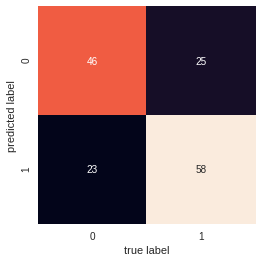

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
print('Knn:')
print('Train set accuracy:', knn.score(x_train, y_train))
print('Test set accuracy:', knn.score(x_test, y_test))

cnf = confusion_matrix(y_train, knn.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, knn.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, knn.predict(x_test)))

Decision Tree:
Train set accuracy: 1.0
Test set accuracy: 0.7039473684210527
The confusion metrix of tranning set
 [[69  0]
 [ 0 82]]
The confusion metrix of testing set
 [[48 21]
 [24 59]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        69
           1       0.74      0.71      0.72        83

    accuracy                           0.70       152
   macro avg       0.70      0.70      0.70       152
weighted avg       0.71      0.70      0.70       152



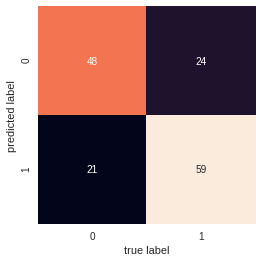

In [ ]:
#Decision Tree
dt = tree.DecisionTreeClassifier()

dt.fit(x_train, y_train)
print('Decision Tree:')
print('Train set accuracy:', dt.score(x_train, y_train))
print('Test set accuracy:', dt.score(x_test, y_test))

cnf = confusion_matrix(y_train, dt.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, dt.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, dt.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, dt.predict(x_test)))

In [ ]:
from sklearn.naive_bayes import GaussianNB

GaussianNB:
Train set accuracy: 0.8609271523178808
Test set accuracy: 0.8026315789473685
The confusion metrix of tranning set
 [[57 12]
 [ 9 73]]
The confusion metrix of testing set
 [[50 19]
 [11 72]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        69
           1       0.79      0.87      0.83        83

    accuracy                           0.80       152
   macro avg       0.81      0.80      0.80       152
weighted avg       0.80      0.80      0.80       152



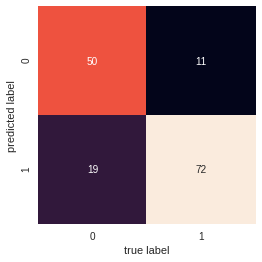

In [ ]:
g_nb = GaussianNB(priors=None)
g_nb_fit = g_nb.fit(x_train, y_train)

print('GaussianNB:')
print('Train set accuracy:', g_nb.score(x_train, y_train))
print('Test set accuracy:', g_nb.score(x_test, y_test))

cnf = confusion_matrix(y_train, g_nb.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, g_nb.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, g_nb.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, g_nb.predict(x_test)))

RandomForest:
Train set accuracy: 0.9933774834437086
Test set accuracy: 0.7828947368421053
The confusion metrix of tranning set
 [[68  1]
 [ 0 82]]
The confusion metrix of testing set
 [[49 20]
 [13 70]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        69
           1       0.78      0.84      0.81        83

    accuracy                           0.78       152
   macro avg       0.78      0.78      0.78       152
weighted avg       0.78      0.78      0.78       152



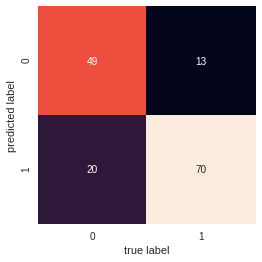

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=14)
rfc_fit = rfc.fit(x_train, y_train)

print('RandomForest:')
print('Train set accuracy:', rfc_fit.score(x_train, y_train))
print('Test set accuracy:', rfc_fit.score(x_test, y_test))

cnf = confusion_matrix(y_train, rfc_fit.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, rfc_fit.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, rfc_fit.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, rfc_fit.predict(x_test)))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

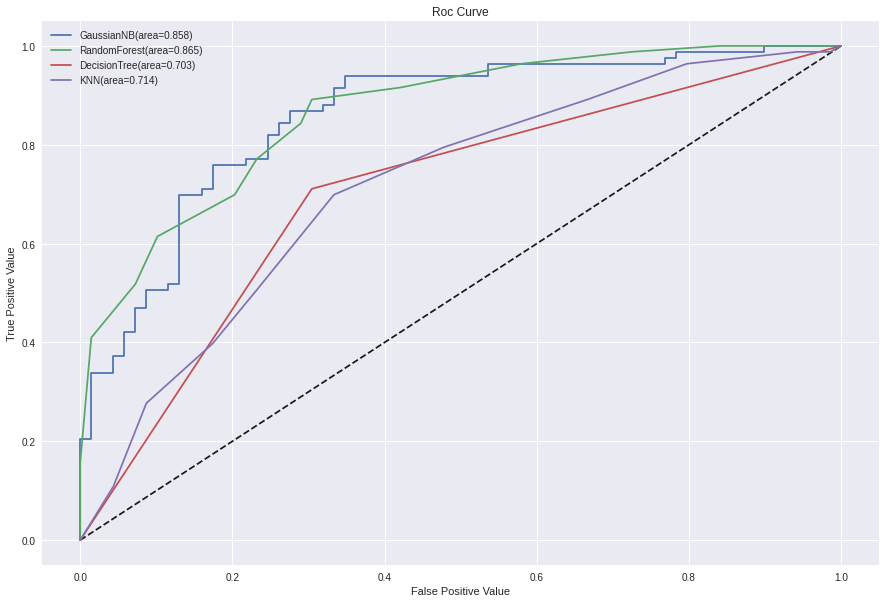

In [ ]:
y_pred_rfc = rfc.predict_proba(x_test)[:,1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(fpr_rfc, tpr_rfc)

y_pred_gnb = g_nb.predict_proba(x_test)[:,1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_gnb)
auc_gnb = auc(fpr_gnb, tpr_gnb)

y_pred_dt = dt.predict_proba(x_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

y_pred_knn = knn.predict_proba(x_test)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(1, figsize=(15,10))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_gnb, tpr_gnb, label='GaussianNB(area={:.3f})'.format(auc_gnb))
plt.plot(fpr_rfc, tpr_rfc, label='RandomForest(area={:.3f})'.format(auc_rfc))
plt.plot(fpr_dt, tpr_dt, label='DecisionTree(area={:.3f})'.format(auc_dt))
plt.plot(fpr_knn, tpr_knn, label='KNN(area={:.3f})'.format(auc_knn))
plt.xlabel('False Positive Value')
plt.ylabel('True Positive Value')
plt.title('Roc Curve')
plt.legend(loc='best')
plt.show()

#Version 2(With PCA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart_df = pd.read_csv('/content/drive/MyDrive/Colab_Practice/Datasets/heart.csv')
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
print(heart_df.info())
print(heart_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set: (303, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    13 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification VISUALIZATION Started #####################


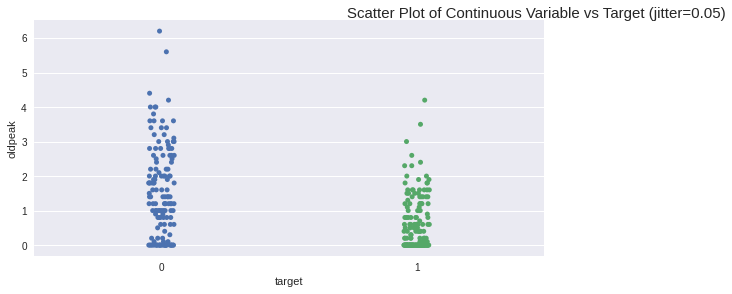

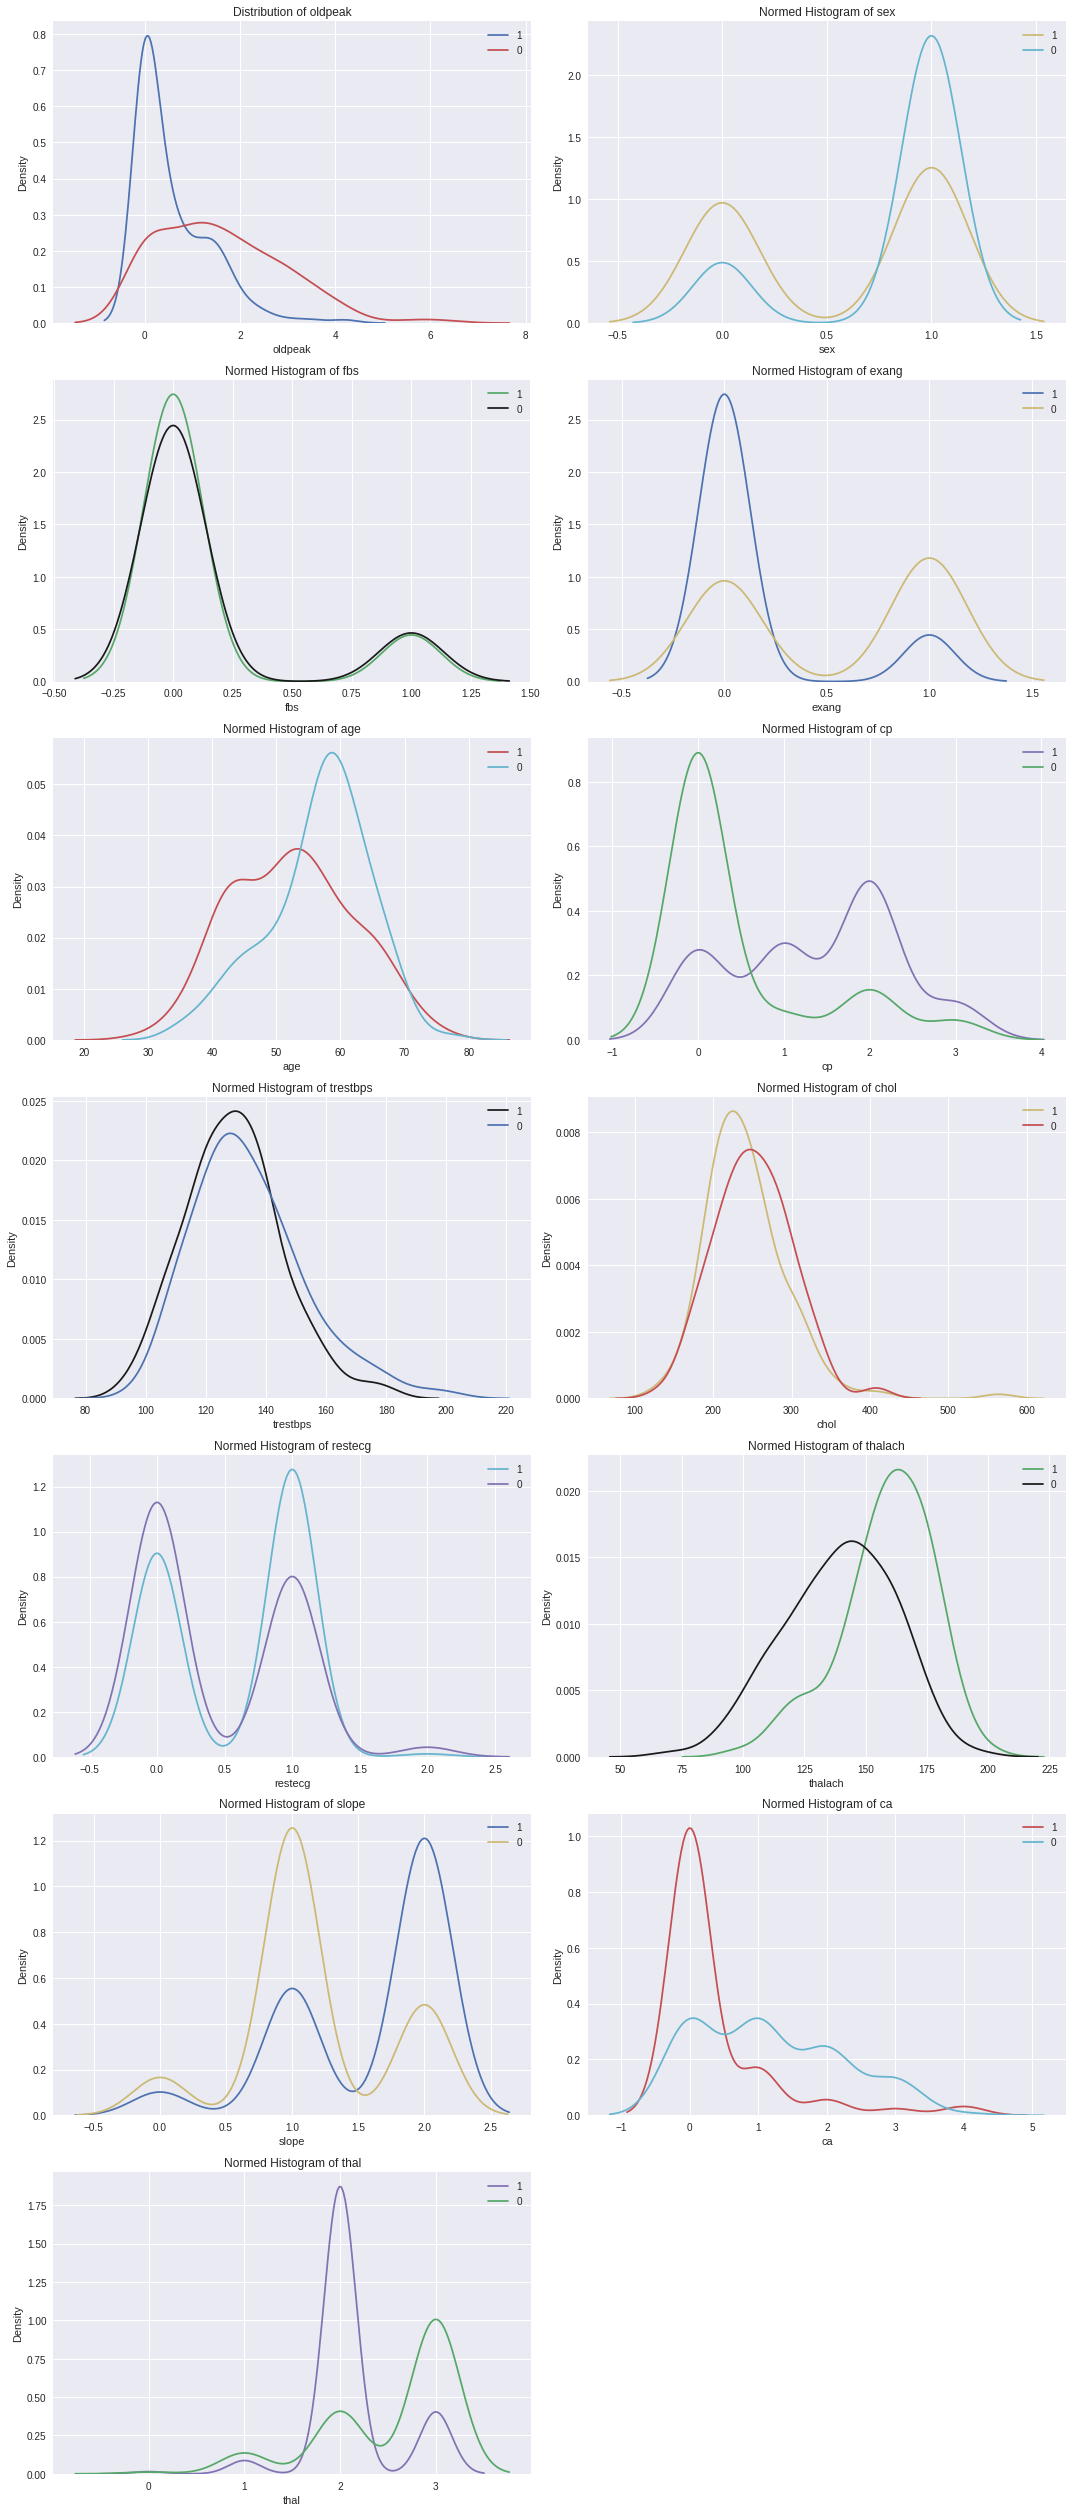

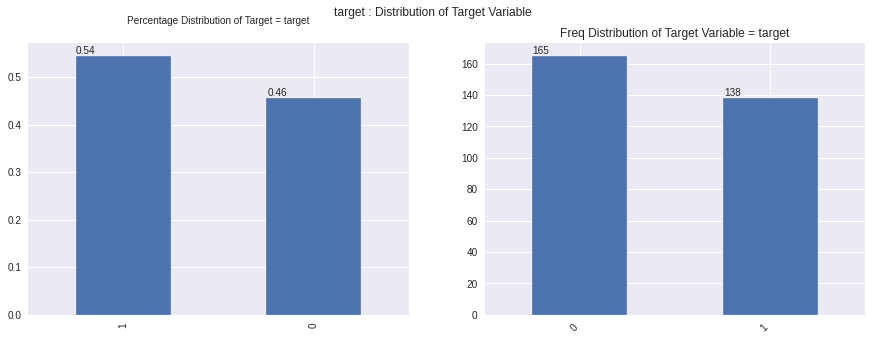

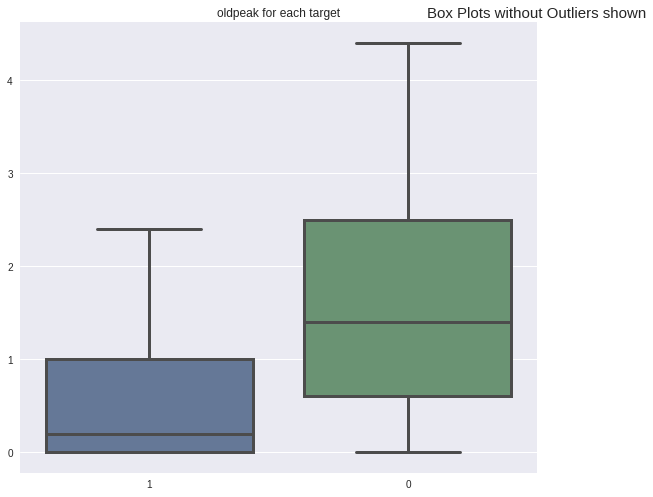

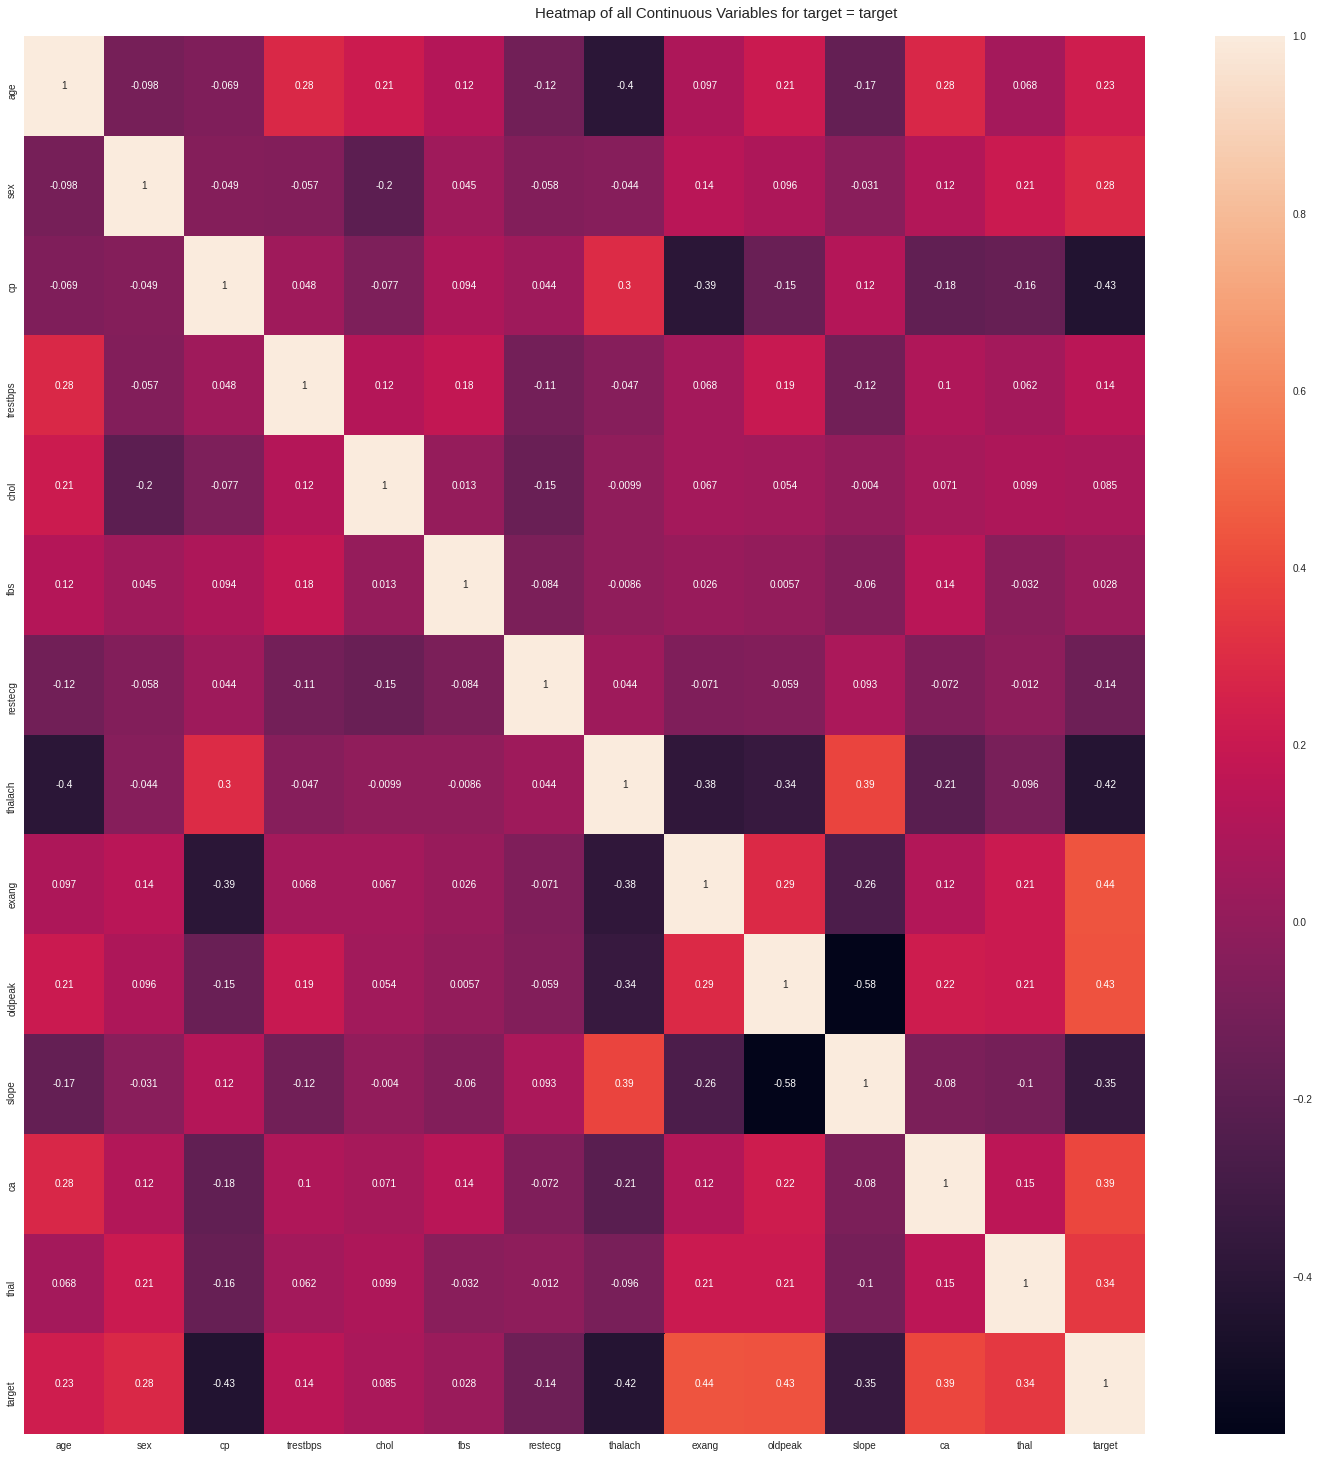

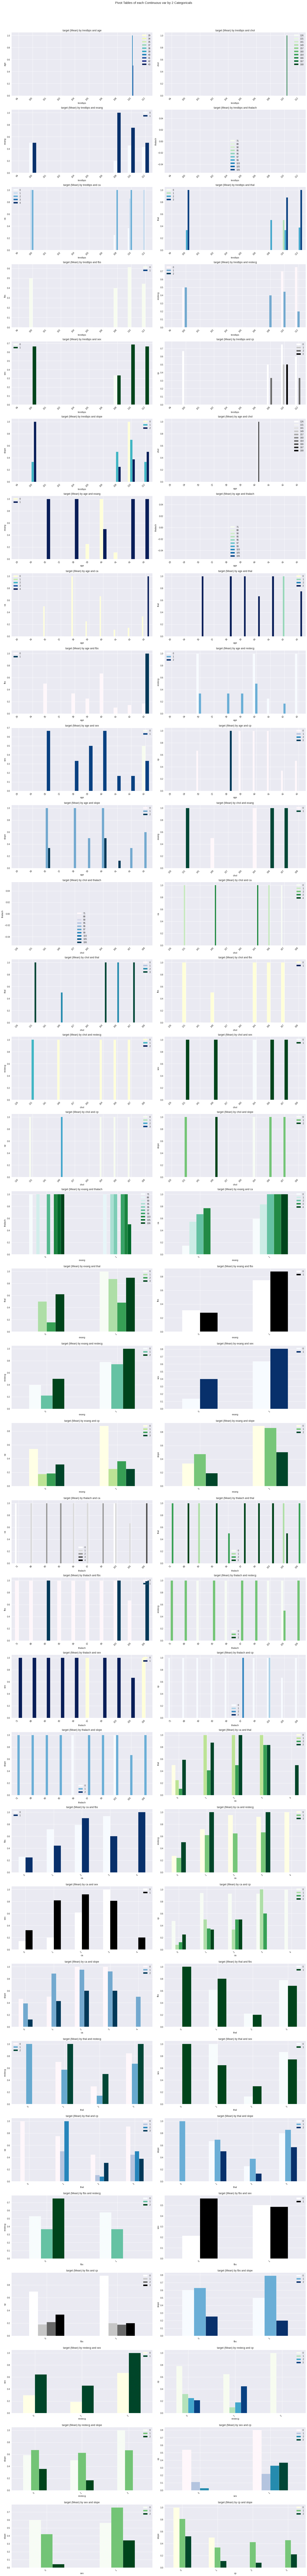

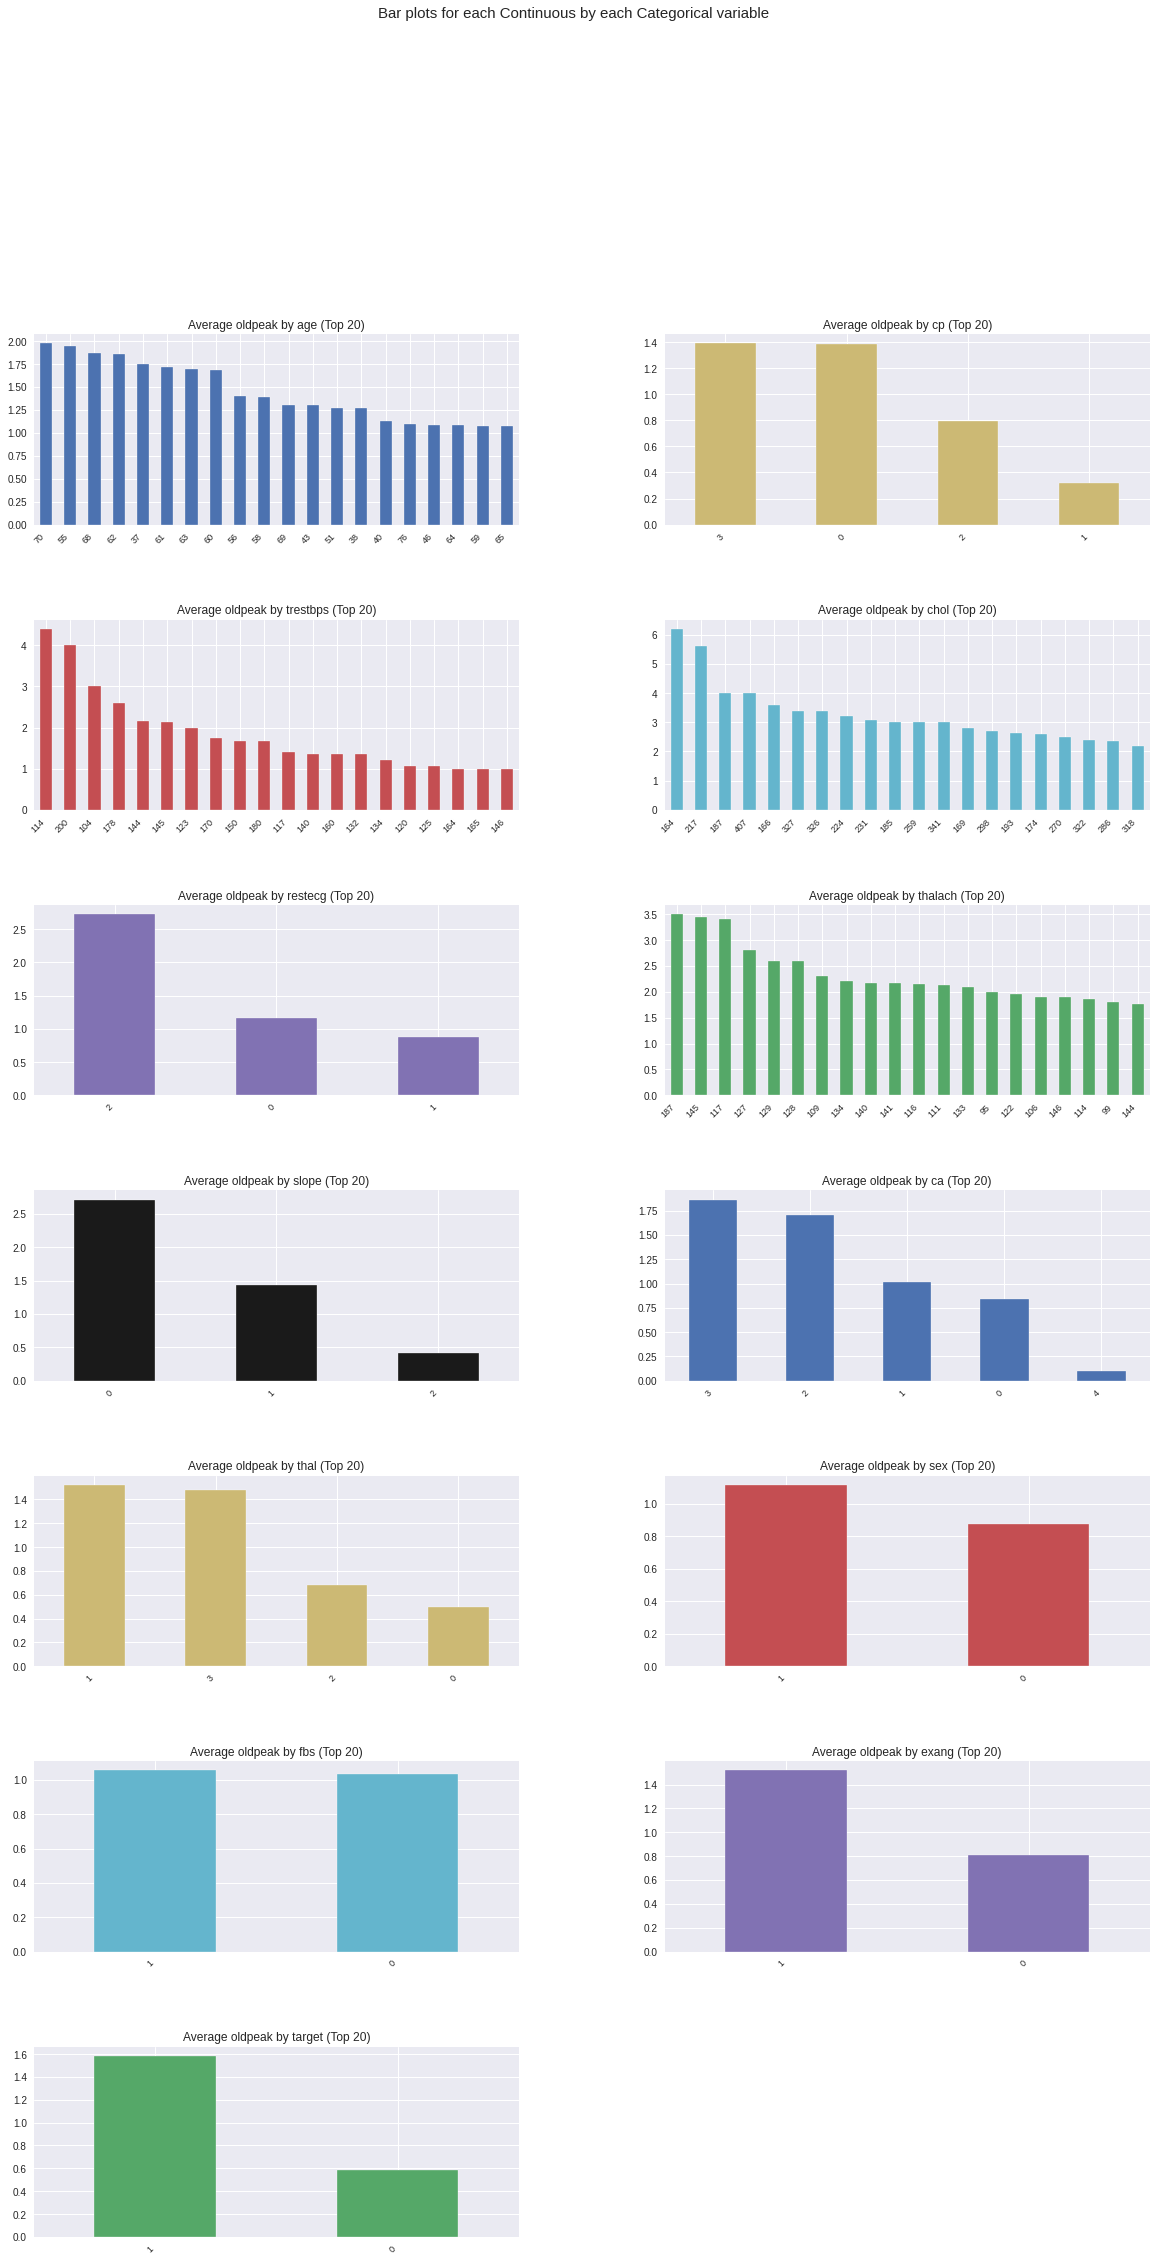

Time to run AutoViz (in seconds) = 32.121

 ###################### VISUALIZATION Completed ########################


In [ ]:
df = AV.AutoViz(filename='/content/drive/MyDrive/Colab_Practice/Datasets/heart.csv', depVar="target")

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
aaa = df[['age', 'trestbps', 'chol','thalach', 'oldpeak']]
bbb  = df.drop(['age', 'trestbps', 'chol','thalach', 'oldpeak'], axis=1)
aaa.info()
bbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   trestbps  303 non-null    int64  
 2   chol      303 non-null    int64  
 3   thalach   303 non-null    int64  
 4   oldpeak   303 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 12.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   sex      303 non-null    int64
 1   cp       303 non-null    int64
 2   fbs      303 non-null    int64
 3   restecg  303 non-null    int64
 4   exang    303 non-null    int64
 5   slope    303 non-null    int64
 6   ca       303 non-null    int64
 7   thal     303 non-null    int64
 8   target   303 non-null    int64
dtypes: int64(9)
memory usage: 21.4 KB


[1 2 3 4 5]
[0.74832448 0.89878417 0.98346093 0.99968256 1.        ]


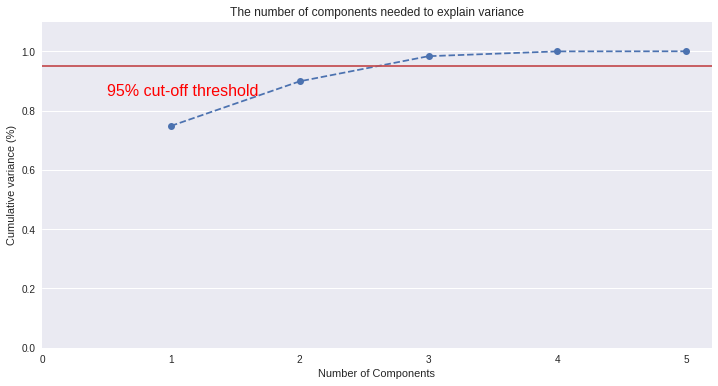

In [ ]:
pca = PCA().fit(aaa)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
print(xi)
print(y)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 6, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
pca = PCA(n_components=3)
pca.fit(aaa)
x_pca_a = pca.transform(aaa)
print("original shape: ", aaa.shape)
print("transformed shape: ", x_pca_a.shape)

original shape:  (303, 5)
transformed shape:  (303, 3)


In [ ]:
pca = PCA(n_components='mle')
pca.fit(aaa)
x_pca_a_mle = pca.transform(aaa)
print("original shape: ", aaa.shape)
print("transformed shape: ", x_pca_a_mle.shape)

original shape:  (303, 5)
transformed shape:  (303, 4)


In [ ]:
x_pca_a = pd.DataFrame(x_pca_a)
x_pca_a_mle = pd.DataFrame(x_pca_a_mle)

In [ ]:
df_pca_a = pd.concat([x_pca_a,bbb], axis=1)
df_pca_a_mle = pd.concat([x_pca_a_mle,bbb], axis=1)

In [ ]:
print(df_pca_a.head())
print(df_pca_a_mle.head())

            0          1          2  sex  cp  ...  exang  slope  ca  thal  target
0  -12.262002   2.896713  14.954828    1   3  ...      0      0   0     1       0
1    2.695004 -39.870489   0.874690    1   2  ...      0      0   0     2       0
2  -42.950471 -23.626963   1.762790    0   1  ...      0      2   0     2       0
3  -10.941438 -28.427149  -7.037848    1   1  ...      0      2   0     2       0
4  106.978994 -15.873752 -14.849703    0   0  ...      1      2   0     2       0

[5 rows x 12 columns]
            0          1          2          3  ...  slope  ca  thal  target
0  -12.262002   2.896713  14.954828   6.893674  ...      0   0     1       0
1    2.695004 -39.870489   0.874690 -10.575970  ...      0   0     2       0
2  -42.950471 -23.626963   1.762790  -7.783435  ...      2   0     2       0
3  -10.941438 -28.427149  -7.037848   8.343407  ...      2   0     2       0
4  106.978994 -15.873752 -14.849703   3.250819  ...      2   0     2       0

[5 rows x 13 columns]


#PCA(n=4)

In [ ]:
y= df_pca_a['target']
x= df_pca_a.drop('target',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

LogisticRegression:
Train set accuracy: 0.8490566037735849
Test set accuracy: 0.8241758241758241
The confusion metrix of tranning set
 [[105  13]
 [ 19  75]]
The confusion metrix of testing set
 [[41  6]
 [10 34]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84        47
           1       0.85      0.77      0.81        44

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



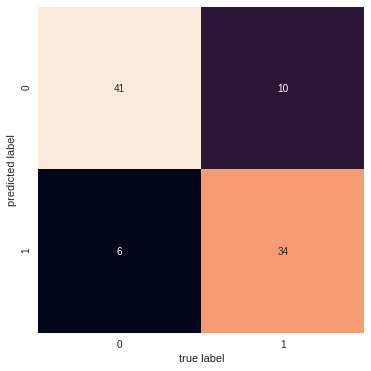

In [ ]:
lr.fit(x_train, y_train)
# pred_1 = lr.predict(x_test)
# score_1 = accuracy_score（y_test, pred_1)
print('LogisticRegression:')
print('Train set accuracy:', lr.score(x_train, y_train))
print('Test set accuracy:', lr.score(x_test, y_test))

cnf = confusion_matrix(y_train, lr.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, lr.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, lr.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, lr.predict(x_test)))

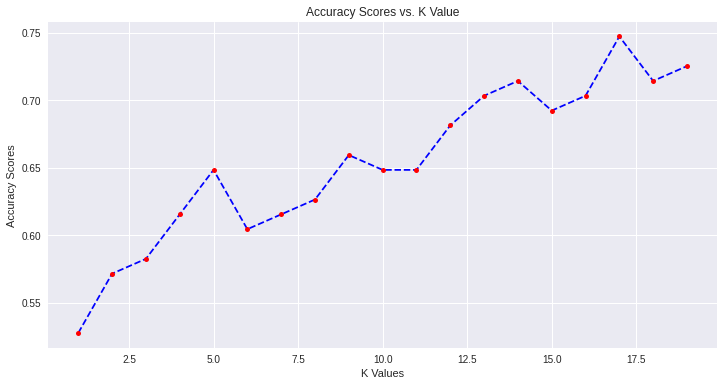

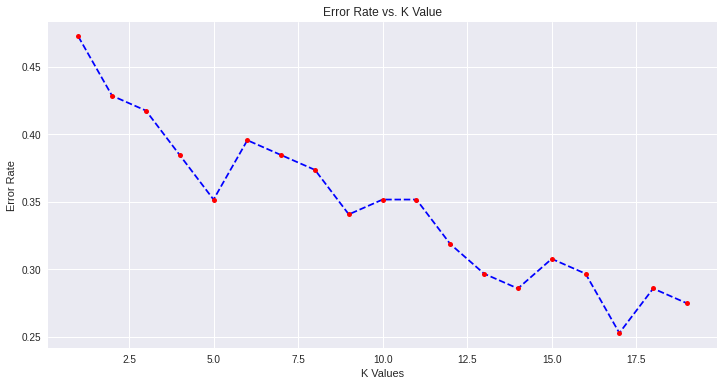

,0,1
0,17,0.747253
1,19,0.725275
2,14,0.714286
3,18,0.714286
4,13,0.703297
5,16,0.703297
6,15,0.692308
7,12,0.681319
8,9,0.659341
9,5,0.648352


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_results={}
error_rate = {}
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_y= knn.predict(x_test)
    error_rate[i] = np.mean(pred_y !=y_test)
    accuracy_results[i] = accuracy_score(y_test,pred_y)

plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()),color="blue", linestyle="dashed",marker="o",markerfacecolor="red",markersize=5)
plt.title("Accuracy Scores vs. K Value")
plt.xlabel('K Values')
plt.ylabel('Accuracy Scores')
plt.show()

plt.plot(list(error_rate.keys()),list(error_rate.values()),color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=5)
plt.title("Error Rate vs. K Value")
plt.xlabel('K Values')
plt.ylabel("Error Rate")
plt.show()

accuracy_results_sorted = sorted(accuracy_results.items(),key= lambda item:item[1], reverse= True)
result_df = pd.DataFrame(accuracy_results_sorted)
result_df

Knn:
Train set accuracy: 0.6886792452830188
Test set accuracy: 0.7472527472527473
The confusion metrix of tranning set
 [[87 31]
 [35 59]]
The confusion metrix of testing set
 [[38  9]
 [14 30]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        47
           1       0.77      0.68      0.72        44

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



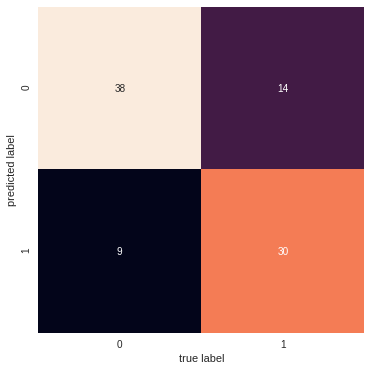

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
print('Knn:')
print('Train set accuracy:', knn.score(x_train, y_train))
print('Test set accuracy:', knn.score(x_test, y_test))

cnf = confusion_matrix(y_train, knn.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, knn.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, knn.predict(x_test)))

Decision Tree:
Train set accuracy: 1.0
Test set accuracy: 0.7582417582417582
The confusion metrix of tranning set
 [[118   0]
 [  0  94]]
The confusion metrix of testing set
 [[37 10]
 [12 32]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        47
           1       0.76      0.73      0.74        44

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



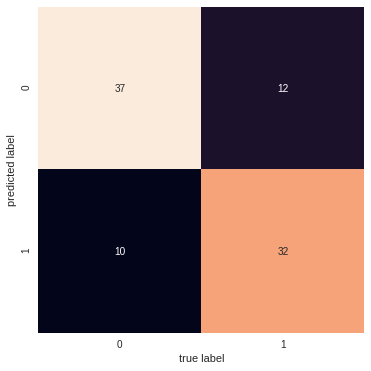

In [ ]:
#Decision Tree
dt = tree.DecisionTreeClassifier()

dt.fit(x_train, y_train)
print('Decision Tree:')
print('Train set accuracy:', dt.score(x_train, y_train))
print('Test set accuracy:', dt.score(x_test, y_test))

cnf = confusion_matrix(y_train, dt.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, dt.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, dt.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, dt.predict(x_test)))

In [ ]:
from sklearn.naive_bayes import GaussianNB

GaussianNB:
Train set accuracy: 0.8443396226415094
Test set accuracy: 0.7912087912087912
The confusion metrix of tranning set
 [[104  14]
 [ 19  75]]
The confusion metrix of testing set
 [[39  8]
 [11 33]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        47
           1       0.80      0.75      0.78        44

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



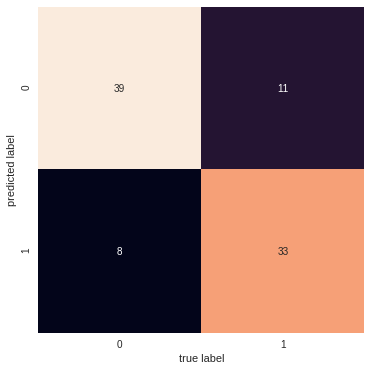

In [ ]:
g_nb = GaussianNB(priors=None)
g_nb_fit = g_nb.fit(x_train, y_train)

print('GaussianNB:')
print('Train set accuracy:', g_nb.score(x_train, y_train))
print('Test set accuracy:', g_nb.score(x_test, y_test))

cnf = confusion_matrix(y_train, g_nb.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, g_nb.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, g_nb.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, g_nb.predict(x_test)))

RandomForest:
Train set accuracy: 0.9952830188679245
Test set accuracy: 0.8241758241758241
The confusion metrix of tranning set
 [[117   1]
 [  0  94]]
The confusion metrix of testing set
 [[40  7]
 [ 9 35]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        47
           1       0.83      0.80      0.81        44

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



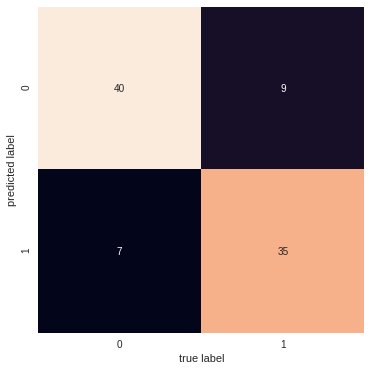

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=17)
rfc_fit = rfc.fit(x_train, y_train)

print('RandomForest:')
print('Train set accuracy:', rfc_fit.score(x_train, y_train))
print('Test set accuracy:', rfc_fit.score(x_test, y_test))

cnf = confusion_matrix(y_train, rfc_fit.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, rfc_fit.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, rfc_fit.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, rfc_fit.predict(x_test)))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

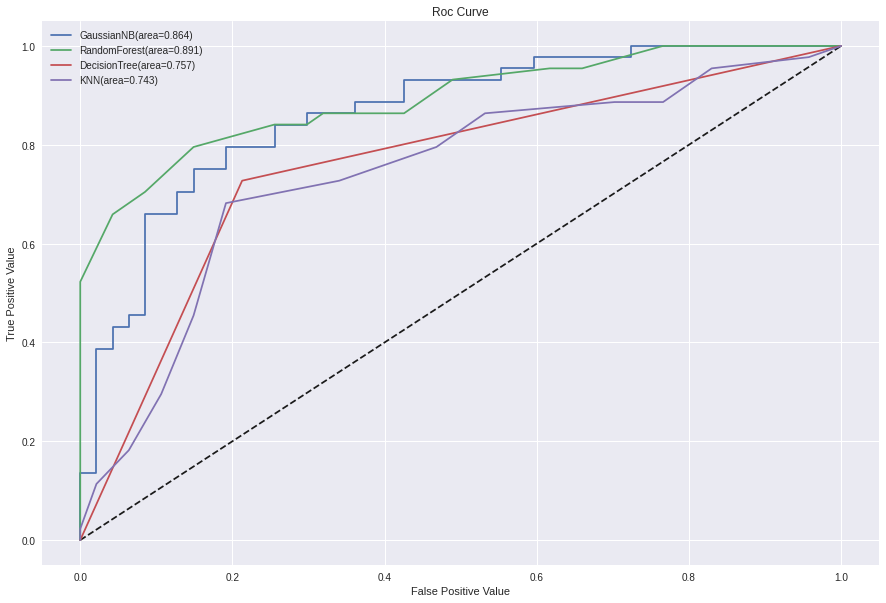

In [ ]:
y_pred_rfc = rfc.predict_proba(x_test)[:,1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(fpr_rfc, tpr_rfc)

y_pred_gnb = g_nb.predict_proba(x_test)[:,1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_gnb)
auc_gnb = auc(fpr_gnb, tpr_gnb)

y_pred_dt = dt.predict_proba(x_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

y_pred_knn = knn.predict_proba(x_test)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(1, figsize=(15,10))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_gnb, tpr_gnb, label='GaussianNB(area={:.3f})'.format(auc_gnb))
plt.plot(fpr_rfc, tpr_rfc, label='RandomForest(area={:.3f})'.format(auc_rfc))
plt.plot(fpr_dt, tpr_dt, label='DecisionTree(area={:.3f})'.format(auc_dt))
plt.plot(fpr_knn, tpr_knn, label='KNN(area={:.3f})'.format(auc_knn))
plt.xlabel('False Positive Value')
plt.ylabel('True Positive Value')
plt.title('Roc Curve')
plt.legend(loc='best')
plt.show()

#PCA(n=mle)

In [ ]:
y= df_pca_a_mle['target']
x= df_pca_a_mle.drop('target',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

LogisticRegression:
Train set accuracy: 0.8490566037735849
Test set accuracy: 0.8351648351648352
The confusion metrix of tranning set
 [[106  12]
 [ 20  74]]
The confusion metrix of testing set
 [[41  6]
 [ 9 35]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        47
           1       0.85      0.80      0.82        44

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



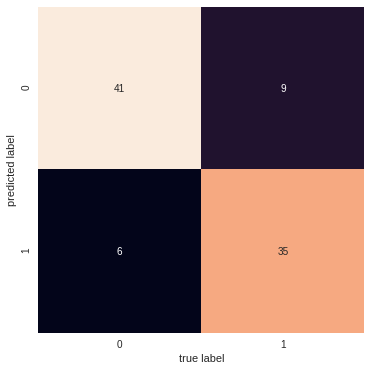

In [ ]:
lr.fit(x_train, y_train)
# pred_1 = lr.predict(x_test)
# score_1 = accuracy_score（y_test, pred_1)
print('LogisticRegression:')
print('Train set accuracy:', lr.score(x_train, y_train))
print('Test set accuracy:', lr.score(x_test, y_test))

cnf = confusion_matrix(y_train, lr.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, lr.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, lr.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, lr.predict(x_test)))

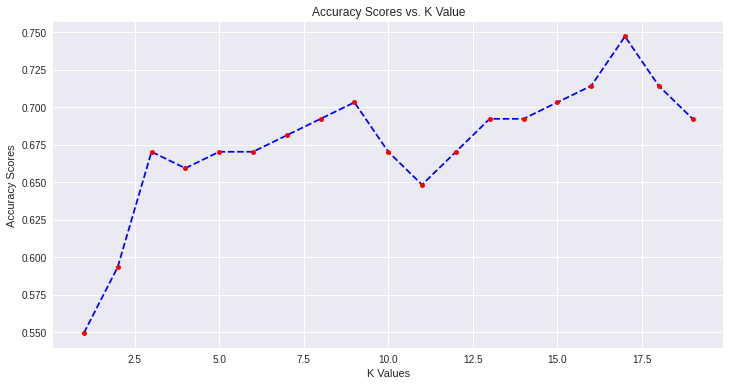

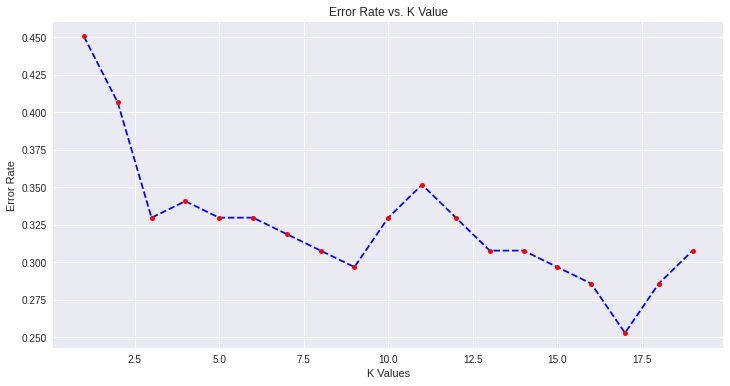

,0,1
0,17,0.747253
1,16,0.714286
2,18,0.714286
3,9,0.703297
4,15,0.703297
5,8,0.692308
6,13,0.692308
7,14,0.692308
8,19,0.692308
9,7,0.681319


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_results={}
error_rate = {}
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_y= knn.predict(x_test)
    error_rate[i] = np.mean(pred_y !=y_test)
    accuracy_results[i] = accuracy_score(y_test,pred_y)

plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()),color="blue", linestyle="dashed",marker="o",markerfacecolor="red",markersize=5)
plt.title("Accuracy Scores vs. K Value")
plt.xlabel('K Values')
plt.ylabel('Accuracy Scores')
plt.show()

plt.plot(list(error_rate.keys()),list(error_rate.values()),color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=5)
plt.title("Error Rate vs. K Value")
plt.xlabel('K Values')
plt.ylabel("Error Rate")
plt.show()

accuracy_results_sorted = sorted(accuracy_results.items(),key= lambda item:item[1], reverse= True)
result_df = pd.DataFrame(accuracy_results_sorted)
result_df

Knn:
Train set accuracy: 0.6886792452830188
Test set accuracy: 0.7472527472527473
The confusion metrix of tranning set
 [[88 30]
 [36 58]]
The confusion metrix of testing set
 [[37 10]
 [13 31]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        47
           1       0.76      0.70      0.73        44

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



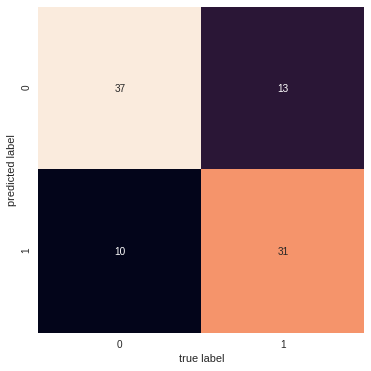

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
print('Knn:')
print('Train set accuracy:', knn.score(x_train, y_train))
print('Test set accuracy:', knn.score(x_test, y_test))

cnf = confusion_matrix(y_train, knn.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, knn.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, knn.predict(x_test)))

Decision Tree:
Train set accuracy: 1.0
Test set accuracy: 0.7142857142857143
The confusion metrix of tranning set
 [[118   0]
 [  0  94]]
The confusion metrix of testing set
 [[38  9]
 [17 27]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.75        47
           1       0.75      0.61      0.67        44

    accuracy                           0.71        91
   macro avg       0.72      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



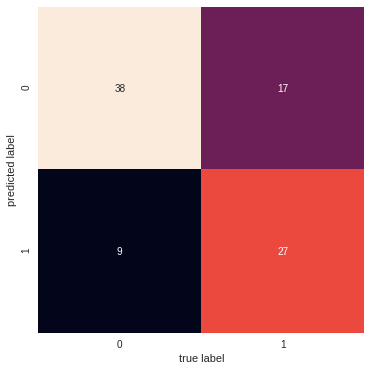

In [ ]:
#Decision Tree
dt = tree.DecisionTreeClassifier()

dt.fit(x_train, y_train)
print('Decision Tree:')
print('Train set accuracy:', dt.score(x_train, y_train))
print('Test set accuracy:', dt.score(x_test, y_test))

cnf = confusion_matrix(y_train, dt.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, dt.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, dt.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, dt.predict(x_test)))

In [ ]:
from sklearn.naive_bayes import GaussianNB

GaussianNB:
Train set accuracy: 0.8254716981132075
Test set accuracy: 0.7802197802197802
The confusion metrix of tranning set
 [[102  16]
 [ 21  73]]
The confusion metrix of testing set
 [[39  8]
 [12 32]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.80        47
           1       0.80      0.73      0.76        44

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



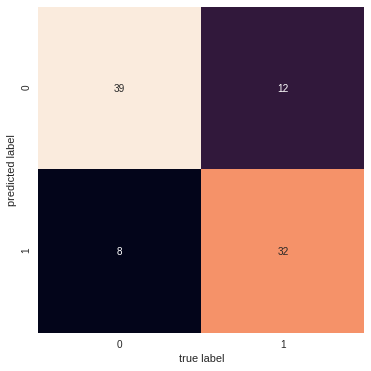

In [ ]:
g_nb = GaussianNB(priors=None)
g_nb_fit = g_nb.fit(x_train, y_train)

print('GaussianNB:')
print('Train set accuracy:', g_nb.score(x_train, y_train))
print('Test set accuracy:', g_nb.score(x_test, y_test))

cnf = confusion_matrix(y_train, g_nb.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, g_nb.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, g_nb.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, g_nb.predict(x_test)))

RandomForest:
Train set accuracy: 1.0
Test set accuracy: 0.8351648351648352
The confusion metrix of tranning set
 [[118   0]
 [  0  94]]
The confusion metrix of testing set
 [[42  5]
 [10 34]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        47
           1       0.87      0.77      0.82        44

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



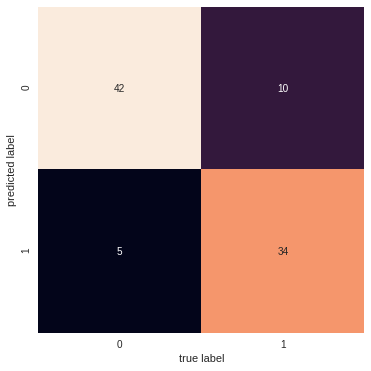

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=17)
rfc_fit = rfc.fit(x_train, y_train)

print('RandomForest:')
print('Train set accuracy:', rfc_fit.score(x_train, y_train))
print('Test set accuracy:', rfc_fit.score(x_test, y_test))

cnf = confusion_matrix(y_train, rfc_fit.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, rfc_fit.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, rfc_fit.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, rfc_fit.predict(x_test)))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

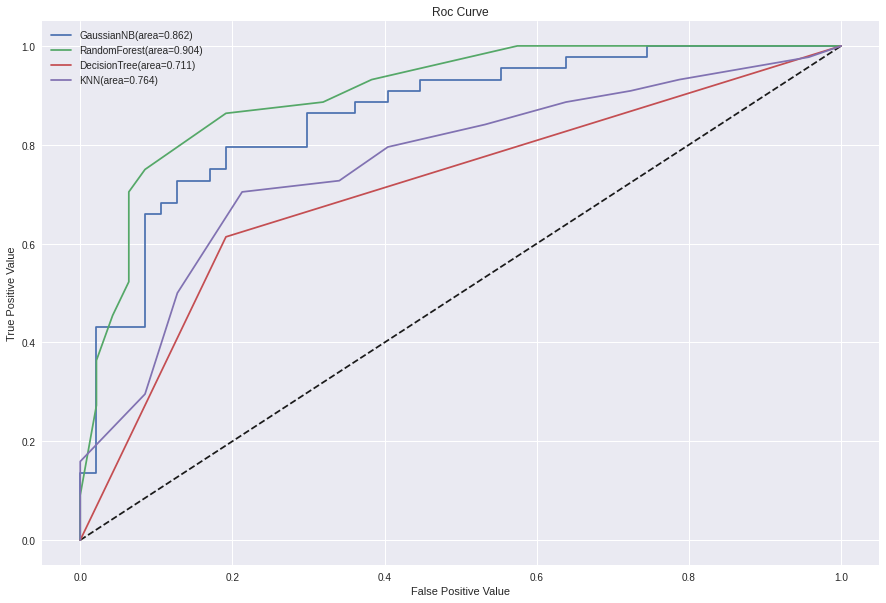

In [ ]:
y_pred_rfc = rfc.predict_proba(x_test)[:,1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(fpr_rfc, tpr_rfc)

y_pred_gnb = g_nb.predict_proba(x_test)[:,1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_gnb)
auc_gnb = auc(fpr_gnb, tpr_gnb)

y_pred_dt = dt.predict_proba(x_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

y_pred_knn = knn.predict_proba(x_test)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(1, figsize=(15,10))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_gnb, tpr_gnb, label='GaussianNB(area={:.3f})'.format(auc_gnb))
plt.plot(fpr_rfc, tpr_rfc, label='RandomForest(area={:.3f})'.format(auc_rfc))
plt.plot(fpr_dt, tpr_dt, label='DecisionTree(area={:.3f})'.format(auc_dt))
plt.plot(fpr_knn, tpr_knn, label='KNN(area={:.3f})'.format(auc_knn))
plt.xlabel('False Positive Value')
plt.ylabel('True Positive Value')
plt.title('Roc Curve')
plt.legend(loc='best')
plt.show()